https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

# Importing Libraries:

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset:

In [16]:
# Loading the Dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Exploration and Preprocessing:

In [17]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")
    print("Descriptive Statistics:")
    print("\n")
    print(df.describe())

# Example usage:
explore_data(df)

Major Moments:
                 Mean  Median  Standard Deviation  Skewness  Kurtosis
math score     66.089    66.0           15.163080 -0.278935  0.274964
reading score  69.169    70.0           14.600192 -0.259105 -0.068265
writing score  68.054    69.0           15.195657 -0.289444 -0.033365


Descriptive Statistics:


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [18]:
# Feature Engineering
df['Total score']=df['math score']+df['reading score']+df['writing score']

In [19]:
# Converting score from int --> float
df['math score']=pd.to_numeric(df['math score'],downcast='float')

In [20]:
# Printing again 
print("Average math score is    : {}".format(np.mean(df['math score'])))
print("Average reading score is : {}".format(np.mean(df['reading score'])))
print("Average writing score is : {}".format(np.mean(df['writing score'])))
print("Average total score is   : {}".format(np.mean(df['Total score'])/3))

Average math score is    : 66.08899688720703
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


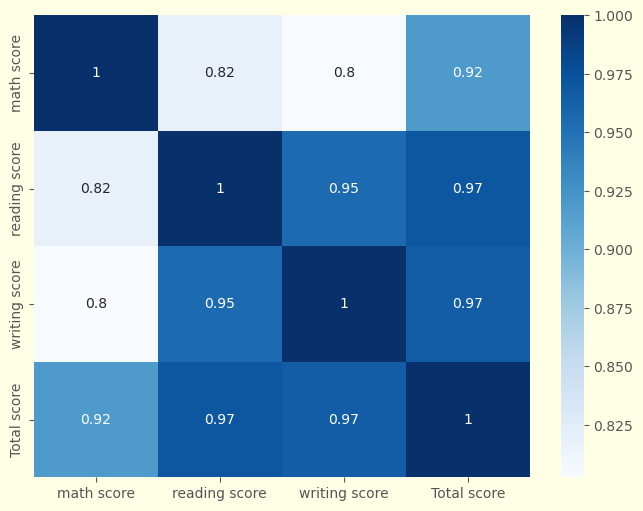

In [25]:
def plot_heatmap(df):
    """
    Plot a heatmap to visualize the correlation matrix of the dataframe.

    Parameters:
    - df (DataFrame): Input dataframe.

    Returns:
    - None: Displays the heatmap.
    
    """

    # Plot heatmap
    numeric_df = df.select_dtypes(include='number')
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
    plt.show()
plot_heatmap(df)

This visualization aids in understanding the relationships between variables and identifying potential multicollinearity issues in regression analysis or clustering.

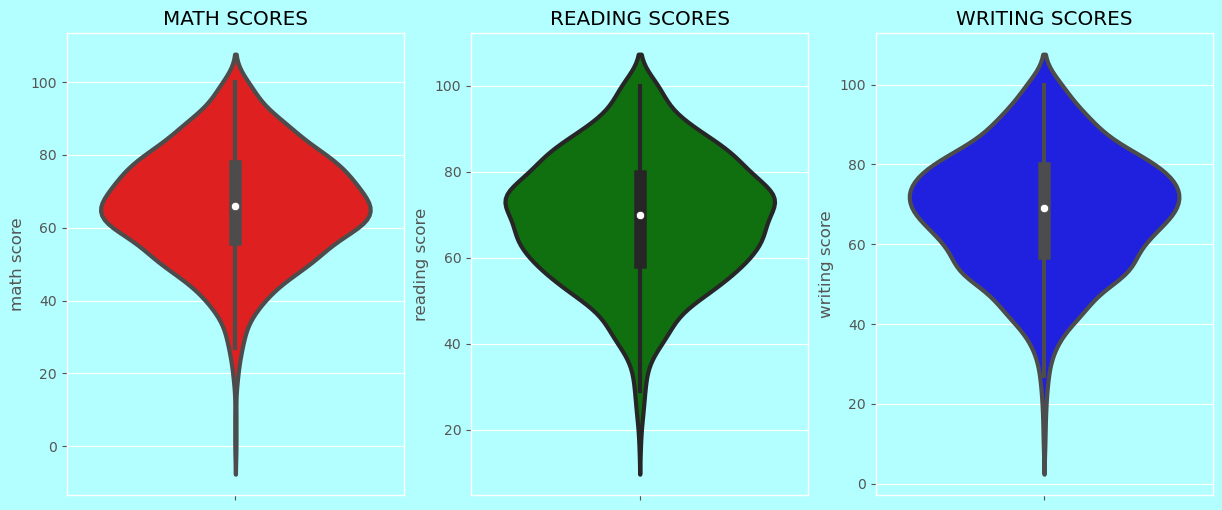

In [26]:
def plot_violin_scores(df):
    """
    Create violin plots to visualize the distribution of math scores, reading scores, and writing scores.

    Parameters:
    - df (DataFrame): Input DataFrame containing columns for math scores, reading scores, and writing scores.

    Returns:
    - None: Displays the violin plots.


    """

    # Set background color
    plt.rcParams['axes.facecolor'] = "#b3ffff"
    plt.rcParams['figure.facecolor'] = "#b3ffff"

    # Create subplots
    plt.figure(figsize=(20,6))
    plt.subplot(1, 4, 1)
    plt.title('MATH SCORES')
    sns.violinplot(y='math score', data=df, color='red', linewidth=3)
    
    plt.subplot(1, 4, 2)
    plt.title('READING SCORES')
    sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
    
    plt.subplot(1, 4, 3)
    plt.title('WRITING SCORES')
    sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
    
    plt.show()

plot_violin_scores(df)

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80



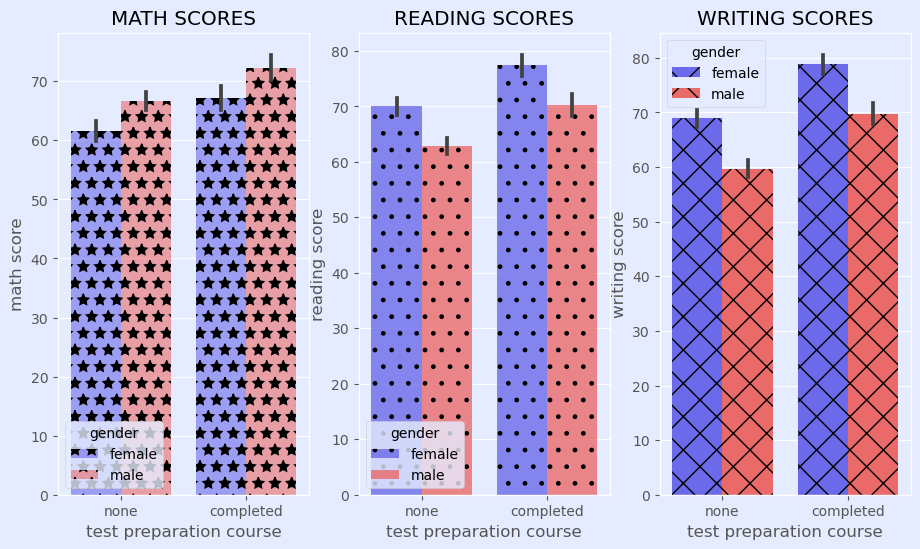

In [27]:
def plot_bar_scores(df):
    """
    Create bar plots to visualize the distribution of math scores, reading scores, and writing scores
    based on the test preparation course and gender.

    Parameters:
    - df (DataFrame): Input DataFrame containing columns for math scores, reading scores, writing scores,
                      test preparation course, and gender.

    Returns:
    - None: Displays the bar plots.

    """

    # Set background color
    plt.rcParams['figure.facecolor'] = "#e6ecff"
    plt.rcParams['axes.facecolor'] = "#e6ecff"

    # Create subplots
    plt.figure(figsize=(11,6))

    plt.subplot(1, 3, 1)
    sns.barplot(x='test preparation course', y='math score', data=df, hue='gender', palette='seismic',
                **{'hatch': '*', 'alpha': 0.6, 'linewidth': 2})
    plt.title('MATH SCORES')

    plt.subplot(1, 3, 2)
    sns.barplot(x='test preparation course', y='reading score', data=df, hue='gender', palette='seismic',
                **{'hatch': '.', 'alpha': 0.8, 'linewidth': 2})
    plt.title('READING SCORES')

    plt.subplot(1, 3, 3)
    sns.barplot(x='test preparation course', y='writing score', data=df, hue='gender', palette='seismic',
                **{'hatch': 'x', 'linewidth': 2})
    plt.title('WRITING SCORES')

    plt.show()
    
plot_bar_scores(df)

<li>From the first plot we can see the math scores of boys are better irrespective of wether they completed the course or no.</li>
<li>From the next two plots we can see that girls perform more better in reading and writing</li>
<li>From all three graphs its clear that if the course is completed we can achieve higher scores</li>
<li>We are increasing alpha by 0.2 starting from 0.6-1.0</li>

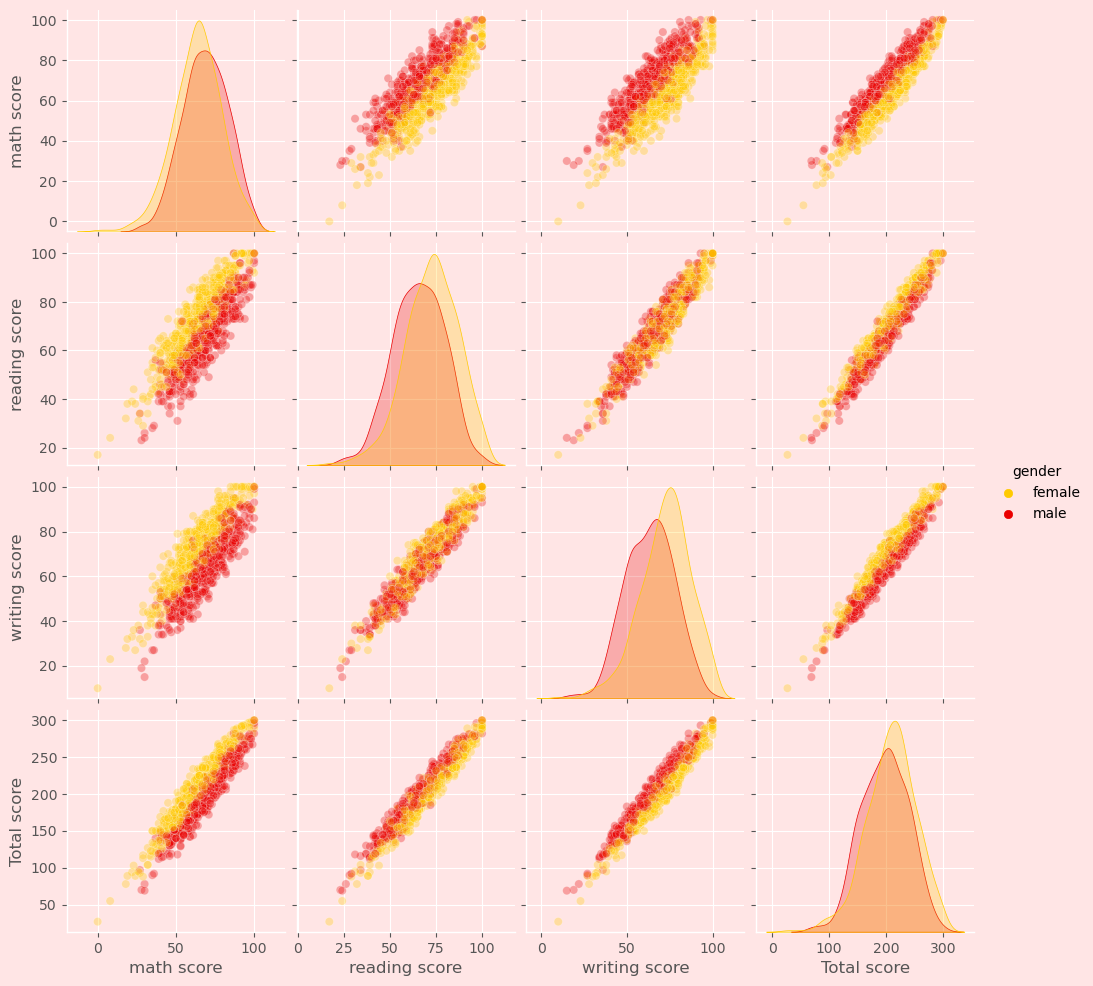

<Figure size 400x400 with 0 Axes>

In [28]:
def plot_pairplot(df):
    """
    Create pair plots to visualize the pairwise relationships and distributions of variables in the DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame containing numerical variables and a categorical variable for hue.

    Returns:
    - None: Displays the pair plots.

    """

    # Set background color
    plt.rcParams['axes.facecolor'] = "#ffe5e5"
    plt.rcParams['figure.facecolor'] = "#ffe5e5"

    # Create pair plots
    sns.pairplot(data=df, hue='gender', plot_kws={'alpha': 0.3}, palette='hot_r')
    plt.figure(figsize=(4, 4))
    plt.show()
plot_pairplot(df)

From the above plot it is clear that all the scores increase linearly with each other.



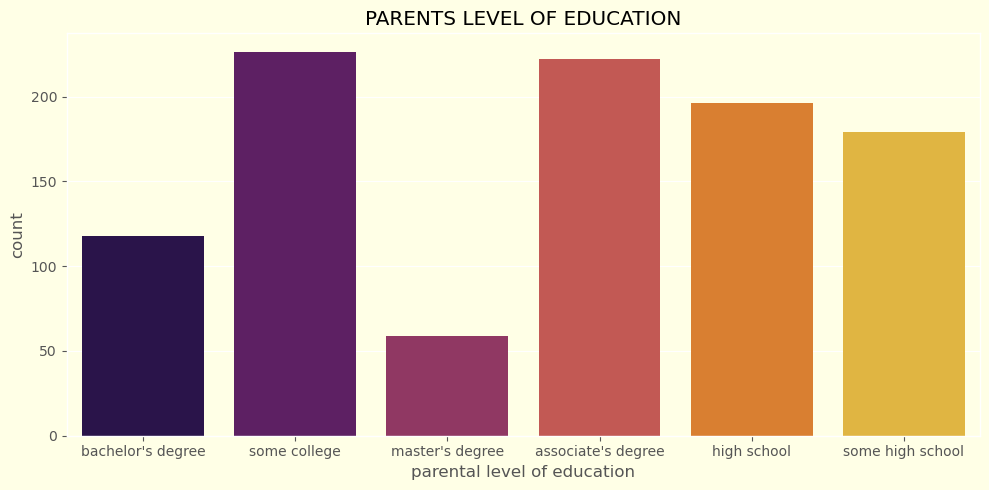

In [29]:
def plot_education_count(df):
    """
    Create a count plot to visualize the distribution of parental level of education.

    Parameters:
    - df (DataFrame): Input DataFrame containing the column 'parental level of education'.

    Returns:
    - None: Displays the count plot.

    """

    # Set background color
    plt.rcParams['figure.facecolor'] = "#ffffe6"
    plt.rcParams['axes.facecolor'] = "#ffffe6"

    # Create count plot
    plt.figure(figsize=(10, 5))
    plt.title('PARENTS LEVEL OF EDUCATION')
    sns.countplot(x='parental level of education', data=df, palette='inferno')
    plt.tight_layout()
    plt.show()
plot_education_count(df)

Thw above plot shows most of the parents went to some college or had associate's degree and there are very less people who had higher studies.



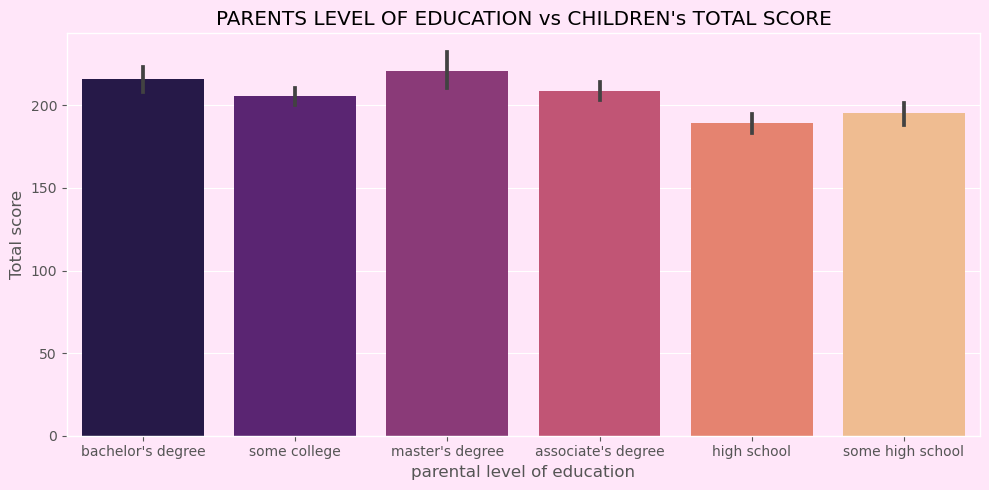

In [30]:
def plot_education_vs_total_score(df):
    """
    Create a bar plot to visualize the relationship between parental level of education 
    and children's total score.

    Parameters:
    - df (DataFrame): Input DataFrame containing the columns 'parental level of education' 
      and 'Total score'.

    Returns:
    - None: Displays the bar plot.

    """

    # Set background color
    plt.rcParams['figure.facecolor'] = "#ffe6f9"
    plt.rcParams['axes.facecolor'] = "#ffe6f9"

    # Create bar plot
    plt.figure(figsize=(10, 5))
    plt.title("PARENTS LEVEL OF EDUCATION vs CHILDREN's TOTAL SCORE")
    sns.barplot(x=df['parental level of education'], y='Total score', data=df, palette='magma')
    plt.tight_layout()
    plt.show()
plot_education_vs_total_score(df)

From the above plot its clear that if the parental education is better their children tend to score better in all areas (math, reading, writing).



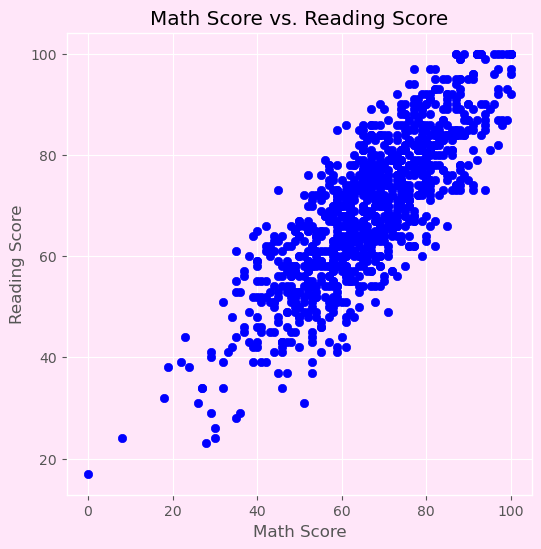

In [31]:
def scatter_plot_math_reading(df):
    """
    Create a scatter plot to visualize the relationship between math scores and reading scores.

    Parameters:
    - df (DataFrame): Input DataFrame containing columns for math scores and reading scores.

    Returns:
    - None: Displays the scatter plot.
    """

    # Create scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(df['math score'], df['reading score'], color='blue')
    plt.title('Math Score vs. Reading Score')
    plt.xlabel('Math Score')
    plt.ylabel('Reading Score')
    plt.grid(True)
    plt.show()

scatter_plot_math_reading(df)

It reveals a positive correlation, suggesting that higher math scores tend to coincide with higher reading scores. However, there is some dispersion in the data, indicating variability in the relationship among individual students. 

In [32]:
df_En = df.copy()

In [33]:
label = LabelEncoder()
df_En["gender"]= label.fit_transform(df["gender"])
df_En["race/ethnicity"]= label.fit_transform(df["race/ethnicity"])
df_En["parental level of education"]= label.fit_transform(df["parental level of education"])
df_En["lunch"]= label.fit_transform(df["lunch"])
df_En["test preparation course"]= label.fit_transform(df["test preparation course"])

In [34]:
df_En.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,1,1,1,1,72.0,72,74,218
1,0,2,4,1,0,69.0,90,88,247
2,0,1,3,1,1,90.0,95,93,278
3,1,0,0,0,1,47.0,57,44,148
4,1,2,4,1,1,76.0,78,75,229


In [35]:
from sklearn.preprocessing import StandardScaler
X=df.iloc[:,[5,6,7]].values
sc_x=StandardScaler()
X=sc_x.fit_transform(X)
df_X = pd.DataFrame(X)

In [36]:
df_X

,0,1,2
0,0.390024,0.193999,0.391492
1,0.192076,1.427476,1.313269
2,1.577711,1.770109,1.642475
3,-1.259543,-0.833899,-1.583744
4,0.653954,0.605158,0.457333
...,...,...,...
995,1.445746,2.044215,1.774157
996,-0.269803,-0.970952,-0.859491
997,-0.467751,0.125472,-0.201079
998,0.126093,0.605158,0.589015


# Clustering:

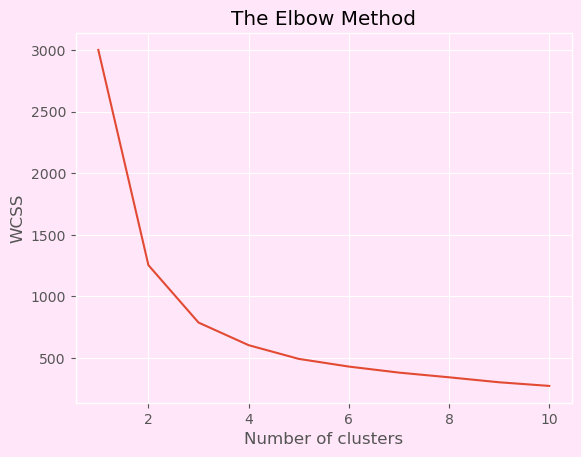

In [37]:
def plot_elbow_method(X):
    """
    Plot the Elbow Method graph to determine the optimal number of clusters using the 
    Within-Cluster-Sum-of-Squares (WCSS) criterion.

    Parameters:
    - X (array-like): Input data for clustering.

    Returns:
    - None: Displays the Elbow Method graph.

    """

    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.plot(range(1, 11), wcss)
    plt.title("The Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("WCSS")
    plt.show()
plot_elbow_method(df_X)

In the graph generated by the plot_elbow_method function, the WCSS decreases as the number of clusters increases, but the rate of decrease slows down around the number of clusters equal to 3. Beyond this point, the reduction in WCSS is less pronounced, suggesting that 3 clusters might be the optimal choice for clustering the data. 

In [38]:
def apply_kmeans(df, n_clusters=3, random_state=0):
    """
    Apply KMeans clustering to the dataframe and add a 'cluster' column indicating the cluster for each data point.

    Parameters:
    - df (DataFrame): Input dataframe.
    - n_clusters (int): Number of clusters for KMeans. Default is 3.
    - random_state (int): Random state for reproducibility. Default is 0.

    Returns:
    - DataFrame: Updated dataframe with a 'cluster' column.
    - kmeans (KMeans): Fitted KMeans object.
    - y_kmeans (array): Array containing the cluster labels assigned to each data point.

    """
    
    # Apply KMeans clustering
    kmeans= KMeans(n_clusters=3, init = "k-means++", random_state=0)
    y_kmeans= kmeans.fit_predict(X)

    # Add 'cluster' column to dataframe
    df['cluster'] = y_kmeans

    return df, kmeans, y_kmeans

df_with_clusters, kmeans, y_kmeans = apply_kmeans(df_X)

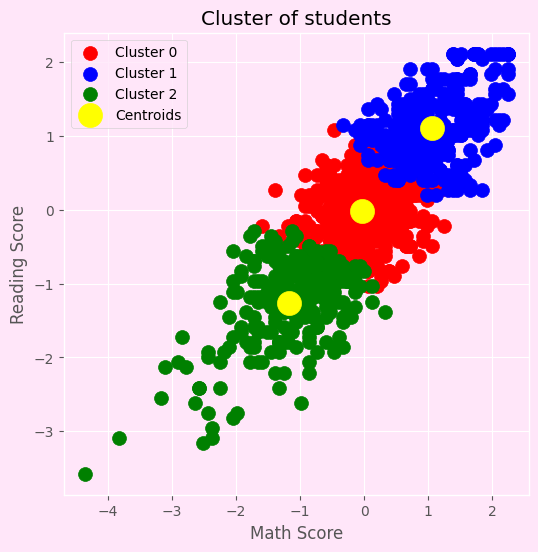

In [56]:
def plot_cluster_results(X, y_kmeans, kmeans):
    """
    Plot the clusters obtained from KMeans clustering along with centroids.

    Parameters:
    - X (array-like): Input data for clustering.
    - y_kmeans (array-like): Array containing the cluster labels assigned to each data point.
    - kmeans (KMeans): Fitted KMeans object.

    Returns:
    - None: Displays the scatter plot of clustered data.

    """
    
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c="red", label="Cluster 0")
    plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c="blue", label="Cluster 1")
    plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c="green", label="Cluster 2")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")
    plt.title("Cluster of students")
    plt.xlabel("Math Score")
    plt.ylabel("Reading Score")
    plt.legend()
    plt.show()

plot_cluster_results(X, y_kmeans, kmeans)

The clusters appear to be well-separated, indicating that the algorithm effectively grouped the data points based on their similarity in the feature space defined by math scores and reading scores. The centroids serve as representative points for each cluster, and their positions suggest the central tendency of the respective clusters in the feature space.

# Linear Regression:

In [41]:
df1 = df_En[['gender', 'race/ethnicity', 'parental level of education', 'lunch']]
X = pd.get_dummies(df1, columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch'], dtype = int)
y = df['Total score']

In [42]:
def run_ols_summary(X, y):
    """
    Run Ordinary Least Squares (OLS) regression and display summary.

    Parameters:
    X (DataFrame): The independent variables.
    y (Series): The dependent variable.

    Returns:
    lin_reg: Linear Regression model
    """
    X_constant = sm.add_constant(X)
    lin_reg = sm.OLS(y, X_constant).fit()
    print(lin_reg.summary())
    return lin_reg
lin_reg =run_ols_summary(X, y)

                            OLS Regression Results                            
Dep. Variable:            Total score   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     19.35
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.54e-35
Time:                        20:15:30   Log-Likelihood:                -5076.8
No. Observations:                1000   AIC:                         1.018e+04
Df Residuals:                     988   BIC:                         1.024e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

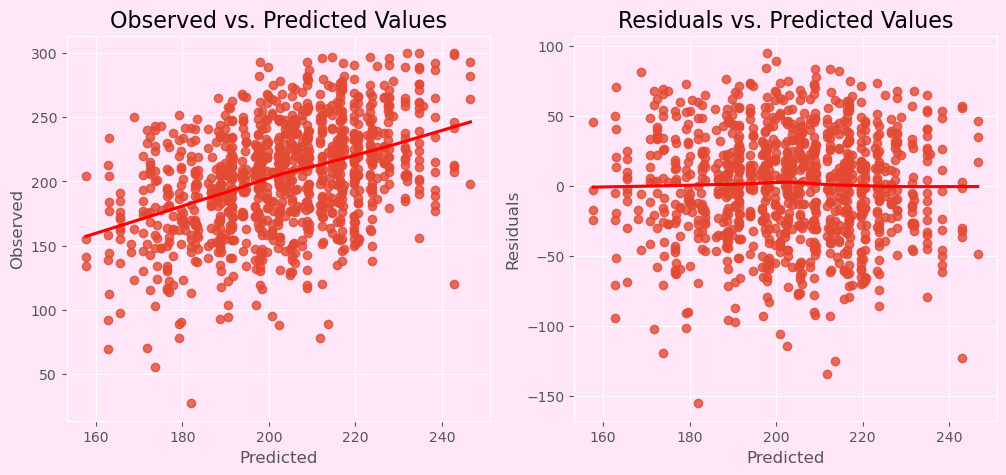

In [43]:
def linearity_test(model, y):
    """
    Check linearity assumption of the linear regression model by plotting observed vs. predicted values
    and residuals vs. predicted values.

    Parameters:
    - model: Fitted linear regression model.
    - y: Observed target variable.

    Returns:
    - None
    """
    fitted_vals = model.predict()
    resids = model.resid
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
linearity_test(lin_reg, y)

Upon evaluating the plots generated from the linearity test function, it appears that the observed vs. predicted values exhibit a fairly linear relationship, indicating that the linear regression model is capturing the underlying linear trend in the data. Additionally, the residuals vs. predicted values plot shows no discernible pattern, suggesting that the model's errors are evenly distributed across the range of predicted values, further supporting the linearity assumption. Therefore, based on these visualizations, we can conclude that the linearity assumption of the linear regression model is reasonable for the given dataset.